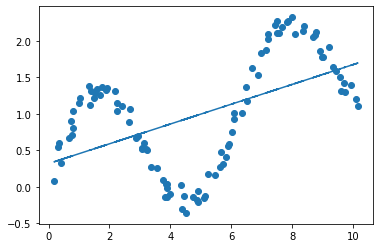

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
n = 100
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train,X_test,y_train,y_test = train_test_split(x, y, random_state=0)
linreg = LinearRegression().fit(X_train.reshape(-1,1),y_train)
pred=linreg.predict(x.reshape(-1,1))
plt.scatter(x,y)
plt.plot(x,pred)

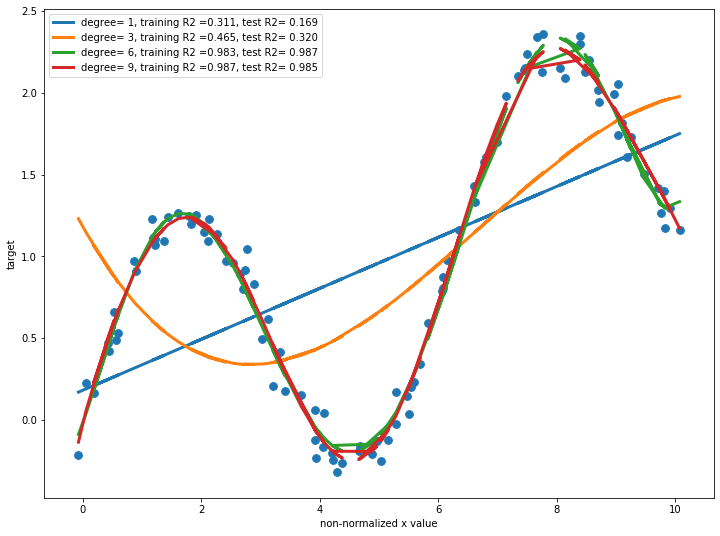

In [4]:
n = 100
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10
degrees = [1,3,6,9]
prediction=[]
rscores =[]
plt.figure(figsize=(12,9))
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    xpoly = poly.fit_transform(x.reshape(-1,1))
    xtrain,xtest,ytrain,ytest =train_test_split(xpoly,y,random_state=0)
    linreg=LinearRegression().fit(xtrain,ytrain)
    rscores.append((linreg.score(xtrain,ytrain),linreg.score(xtest,ytest)))
    prediction.append(linreg.predict(xpoly))
    plt.plot(x,prediction[-1], label="degree= {}, training R2 ={:.3f}, test R2= {:.3f}".format(degree,linreg.score(xtrain,ytrain),\
                                                                                             linreg.score(xtest,ytest)),linewidth=3)
plt.scatter(x,y,s=60)
plt.legend()
plt.xlabel('non-normalized x value')
plt.ylabel('target')

# converting predictions into a 2d array each row containing prediction of the corresponding degree of the polynomial
ypred= np.array(prediction).reshape(4,100)

In [3]:
from sklearn.metrics import r2_score

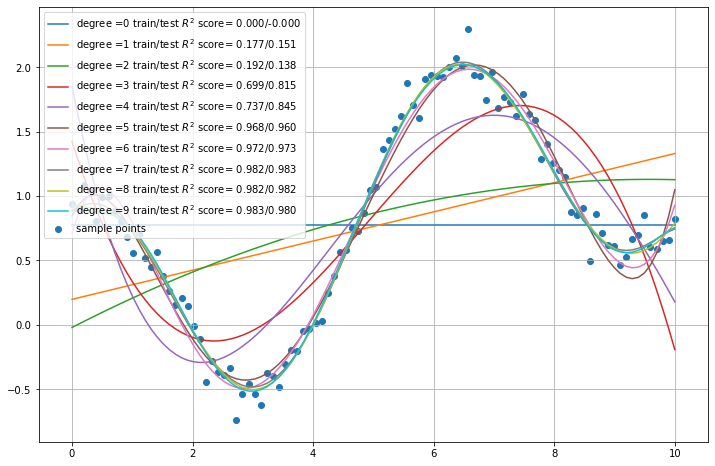

In [5]:
n = 100
x = np.linspace(0,10,n) 
y = np.cos(x)+x/6 + np.random.randn(n)/10

degrees = [0,1,2,3,4,5,6,7,8,9]
ypred =[]
rscores =[]
plt.figure(figsize=(12,8))
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    xpoly = poly.fit_transform(x.reshape(-1,1))
    xtrain,xtest,ytrain,ytest =train_test_split(xpoly,y, random_state=0)
    linreg = LinearRegression().fit(xtrain,ytrain)
    rscores.append((linreg.score(xtrain,ytrain),linreg.score(xtest,ytest)))
    ypred.append(linreg.predict(xpoly))
    plt.plot(x,ypred[-1], label ="degree ={} train/test $R^2$ score= {:.3f}/{:.3f}".format(degree,linreg.score(xtrain,ytrain),linreg.score(xtest,ytest)))

plt.scatter(x,y,label="sample points")
plt.legend()
plt.grid()

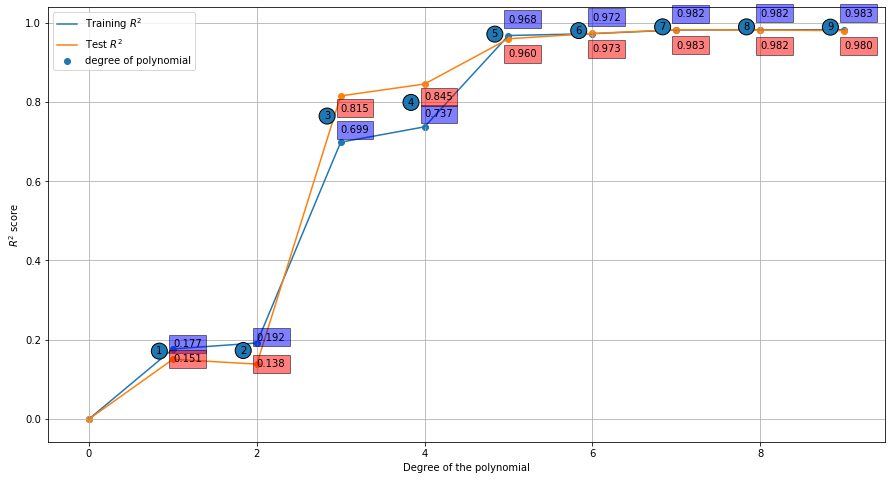

In [6]:
train =[]
test= []
for score1,score2 in rscores:
    train.append(score1)
    test.append(score2)
plt.figure(figsize=(15,8))
plt.plot(degrees,train,label='Training $R^2$')
plt.plot(degrees,test,label='Test $R^2$')
plt.scatter(degrees,train)
plt.scatter(degrees,test)
plt.xlabel('Degree of the polynomial')
plt.ylabel('$R^2$ score')


for deg,val1,val2 in zip(degrees[1:],train[1:],test[1:]):
    plt.text(deg,val1+val1/29,str('{:.3f}'.format(val1)),bbox=dict(facecolor='blue', alpha=0.5))
    plt.text(deg,val2-val2/21,str('{:.3f}'.format(val2)), bbox=dict(facecolor='red', alpha=0.5))
    plt.text(deg-0.2,(val2+val1)/2,str(deg), bbox=dict(edgecolor='black', facecolor=None, boxstyle='circle'))
plt.grid()
plt.legend(['Training $R^2$','Test $R^2$', 'degree of polynomial'])

In [8]:
from sklearn.linear_model import Lasso, LinearRegression
degree =12
n = 100
x = np.linspace(0,10,n) 
y = np.cos(x)+x/6 + np.random.randn(n)/10
poly =PolynomialFeatures(degree=degree)
xpoly = poly.fit_transform(x.reshape(-1,1))

xtrain,xtest,ytrain,ytest = train_test_split(xpoly,y, random_state=0)

linreg = LinearRegression().fit(xtrain,ytrain)
lasso =Lasso().fit(xtrain,ytrain)
print('$R^2 score for linear regression on training data for polynomial degree {} ={:.3f}'.format(degree,linreg.score(xtrain,ytrain)))
print('$R^2 score for lasso regression on training data for polynomial degree {} ={:.3f}'.format(degree,lasso.score(xtrain,ytrain)))

print('\n\n')

print('$R^2 score for linear regression on test data for polynomial degree {} ={:.3f}'.format(degree,linreg.score(xtest,ytest)))
print('$R^2 score for lasso regression on test data for polynomial degree {} ={:.3f}'.format(degree,lasso.score(xtest,ytest)))

$R^2 score for linear regression on training data for polynomial degree 12 =0.985
$R^2 score for lasso regression on training data for polynomial degree 12 =0.658



$R^2 score for linear regression on test data for polynomial degree 12 =0.979
$R^2 score for lasso regression on test data for polynomial degree 12 =0.548


C:\Users\Dinu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.126179597314527, tolerance: 0.004338365780071089
  positive)


In [9]:
import pandas as pd

In [10]:
mdf = pd.read_csv(r'C:\Users\Dinu\Downloads\mushroom.data', header=None)

mdf.columns=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

dummydf = pd.get_dummies(mdf)
x = dummydf.iloc[:,2:]
y =  dummydf.iloc[:,1]

xtrain,xtest,ytrain,ytest =train_test_split(x,y,random_state=0)

xsub,ysub = xtest,ytest
mdf.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
# find the top five important features in the decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(xtrain,ytrain)

topfive =[]
featurescores=zip(clf.feature_importances_,xtrain.columns)
for score,name in sorted(featurescores)[-5:]:
    topfive.append((name,score))
topfive =topfive[::-1]
print(topfive)

[('odor_n', 0.6251435175471661), ('stalk-root_c', 0.1691757144252228), ('stalk-surface-below-ring_y', 0.10032452569696344), ('spore-print-color_r', 0.03437506344670402), ('spore-print-color_u', 0.023503682936672883)]


In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

gamma = np.logspace(-4,1,6)

train_score,test_score = validation_curve(SVC(kernel='rbf', C=1,random_state=0), xsub,ysub, param_name='gamma',param_range=gamma, scoring='accuracy',cv=3)
train_means=[np.mean(train_score[i,:]) for i in range(6)]
test_means=[np.mean(test_score[i,:]) for i in range(6)]

Text(0.5, 1, 'test')

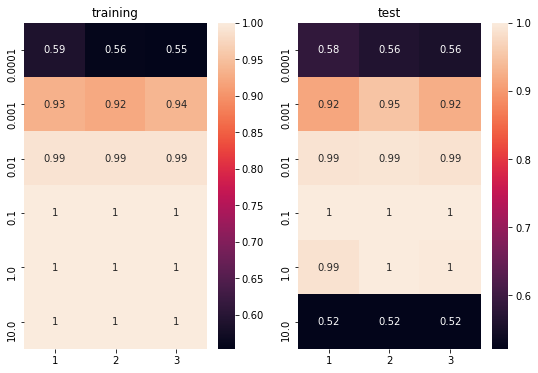

In [72]:
import seaborn as sns
trm =np.array(train_means)
tsm =np.array(test_means)

plt.figure(figsize=(9,6))
ax=plt.subplot(121)
sns.heatmap(train_score,xticklabels=['1','2','3'], yticklabels=gamma,annot=True)
plt.title('training')

plt.subplot(122,sharey=ax)
sns.heatmap(test_score,xticklabels=['1','2','3'], yticklabels=gamma,annot=True)
plt.title('test')

Text(0, 0.5, 'accuracy')

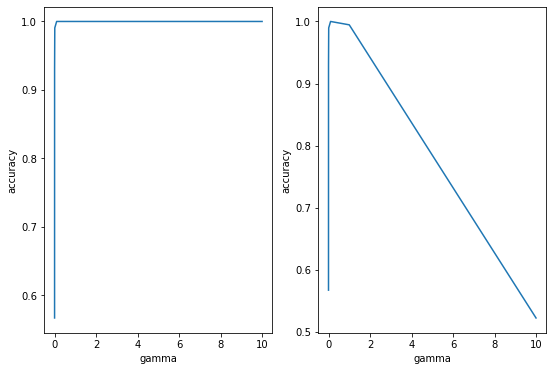

In [62]:
plt.figure(figsize=(9,6))
plt.subplot(121)
plt.plot(gamma,train_means,label='training scores')
plt.xlabel('gamma')
plt.ylabel('accuracy')

plt.subplot(122)
plt.plot(gamma,test_means,label='test scores')
plt.xlabel('gamma')
plt.ylabel('accuracy')

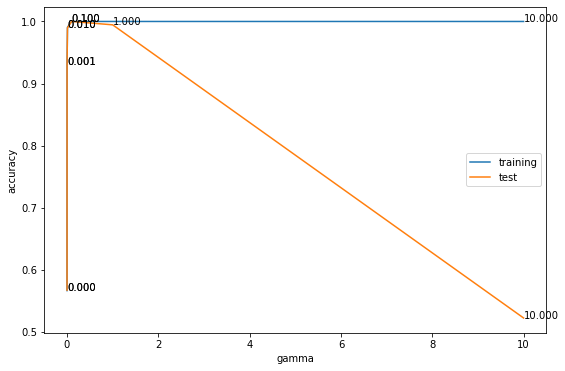

In [71]:
plt.figure(figsize=(9,6))
plt.plot(gamma,train_means,label='training')
plt.plot(gamma,test_means,label='test')
plt.xlabel('gamma')
plt.ylabel('accuracy')
for gam,tscore,trscore in zip(gamma,test_means,train_means):
    plt.text(gam,tscore,str('{:.3f}'.format(gam)))
    if gam!=1:
        plt.text(gam,trscore,str('{:.3f}'.format(gam)))
plt.legend(loc=7)